> TDT4265 - Computer Vision & Deep Learning <br />
> Dionysios Rigatos <br />
> dionysir@stud.ntnu.no <br />

# Submission Visualization - ASOCA

In this notebook, we will visualize a slice of one submission of the ASOCA competition test set. 

In [1]:
import matplotlib.pyplot as plt

import torch
from utils.data_loaders.asoca_loader import ASOCALoader
from config.asoca.transforms import test_transforms
import nrrd

Let's select a random submission and visualize it.

In [2]:
SEG = "data/preds/out_sub/0.nrrd"

In [3]:
ASOCALoader = ASOCALoader(train_transforms=[], val_transforms=[], test_transforms=test_transforms[:1])
test_loader = ASOCALoader.get_test_dataloader()

Loading dataset: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


In [4]:
pred, header = nrrd.read(SEG)
print(pred.shape)

(512, 512, 185)


Select a slice from 0 to `pred.shape[2]`.

In [5]:
slice_num = 90

Finally, let's visualize the slice as well as the prediction. We have no ground truth for the test set, so we will only visualize the prediction.

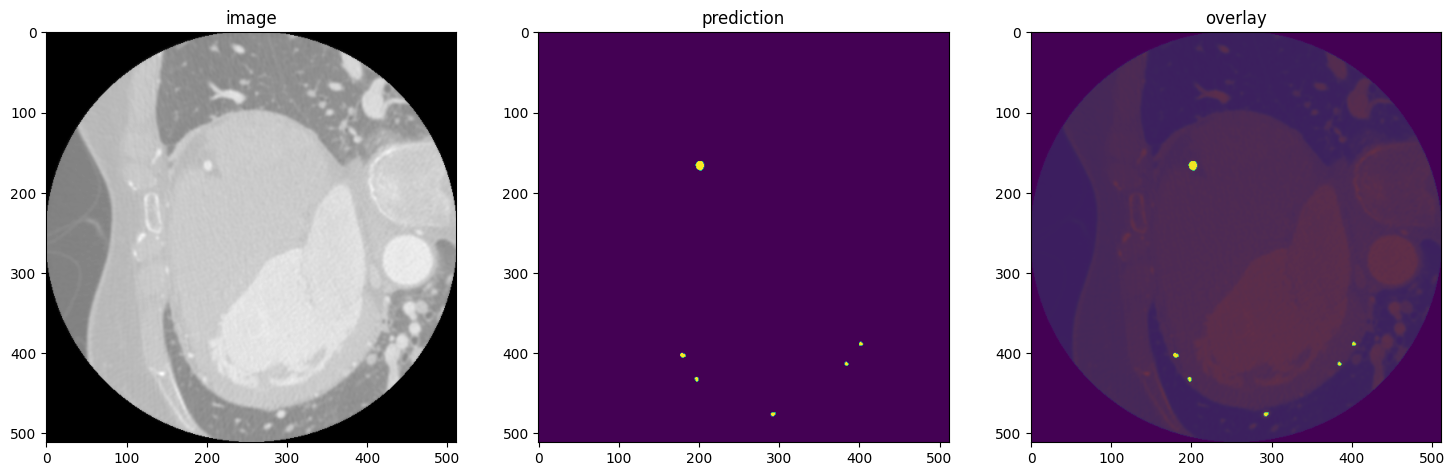

In [6]:
with torch.no_grad():
    for i, batch_data in enumerate(test_loader):
        if i == 0:
            img = batch_data["image"].detach().cpu().numpy()
            
            plt.figure("image", (18, 6))
            plt.subplot(1, 3, 1)
            plt.title("image")
            plt.imshow(img[0, 0, :, :, slice_num], cmap="gray")
            plt.subplot(1, 3, 2)
            plt.title("prediction")
            plt.imshow(pred[:, :, slice_num])
            plt.subplot(1, 3, 3)
            plt.title("overlay")
            plt.imshow(img[0, 0, :, :, slice_num])
            plt.imshow(pred[:, :, slice_num], alpha=0.8)
            
            # plt.savefig(f"slice_{slice_num}.png")
            
            plt.show()